In [424]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [505]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from mineut import plot_tools as pt
from mineut import const
from mineut import lattice_tools as lt

## Collider ring lattices

In [ ]:
emittance_RMS = 0.5e-9 # meters

twiss_file_path_3tev = 'beam-optics/mc3tev_v1.2.tfs'
df_3tev  = lt.get_lattice_dataframe_from_tfs(twiss_file_path_3tev)
lattice_dict_3tev  = lt.create_smoothed_lattice(df_3tev, n_elements=50_000, emittance_RMS=emittance_RMS)

twiss_file_path_10tev = 'beam-optics/ring_v06.tfs'
df_10tev = lt.get_lattice_dataframe_from_tfs(twiss_file_path_10tev)
lattice_dict_10tev = lt.create_smoothed_lattice(df_10tev, n_elements=50_000, emittance_RMS=emittance_RMS)

In [536]:
beta_star = 1.5e-3 # meters
gamma_factor = 5e3/const.m_mu
area = np.pi*beta_star * emittance_RMS * const.m_to_cm**2 # cm^2

Nmu = 1.8e12
f = const.c_LIGHT/8.6688e5
print(f"MuC Luminosity: {Nmu**2 * f / 4 / area:.2g} cm^-2 s^-1")


MuC Luminosity: 1.2e+36 cm^-2 s^-1


# RCS lattices

Loading up all RCS rings

In [ ]:
twiss_file_path_RCS1_ext = "beam-optics/rcs1_ds_ext.tfs"
df_RCS1_ext = lt.get_lattice_dataframe_from_tfs(twiss_file_path_RCS1_ext)
lattice_dict_RCS1_ext  = lt.create_smoothed_lattice(df_RCS1_ext, n_elements=50_000, emittance_RMS=emittance_RMS)

twiss_file_path_RCS2_ext = "beam-optics/rcs2_ds_ext.tfs"
df_RCS2_ext = lt.get_lattice_dataframe_from_tfs(twiss_file_path_RCS2_ext)
lattice_dict_RCS2_ext  = lt.create_smoothed_lattice(df_RCS2_ext, n_elements=50_000, emittance_RMS=emittance_RMS)

twiss_file_path_RCS3_ext = "beam-optics/rcs3_ds_ext.tfs"
df_RCS3_ext = lt.get_lattice_dataframe_from_tfs(twiss_file_path_RCS3_ext)
lattice_dict_RCS3_ext  = lt.create_smoothed_lattice(df_RCS3_ext, n_elements=50_000, emittance_RMS=emittance_RMS)

twiss_file_path_RCS4_ext = "beam-optics/rcs4_ds_ext.tfs"
df_RCS4_ext = lt.get_lattice_dataframe_from_tfs(twiss_file_path_RCS4_ext)
lattice_dict_RCS4_ext  = lt.create_smoothed_lattice(df_RCS4_ext, n_elements=50_000, emittance_RMS=emittance_RMS)


twiss_file_path_RCS1_inj = "beam-optics/rcs1_ds_inj.tfs"
df_RCS1_inj = lt.get_lattice_dataframe_from_tfs(twiss_file_path_RCS1_inj)
lattice_dict_RCS1_inj  = lt.create_smoothed_lattice(df_RCS1_inj, n_elements=50_000, emittance_RMS=emittance_RMS)

twiss_file_path_RCS2_inj = "beam-optics/rcs2_ds_inj.tfs"
df_RCS2_inj = lt.get_lattice_dataframe_from_tfs(twiss_file_path_RCS2_inj)
lattice_dict_RCS2_inj  = lt.create_smoothed_lattice(df_RCS2_inj, n_elements=50_000, emittance_RMS=emittance_RMS)

twiss_file_path_RCS3_inj = "beam-optics/rcs3_ds_inj.tfs"
df_RCS3_inj = lt.get_lattice_dataframe_from_tfs(twiss_file_path_RCS3_inj)
lattice_dict_RCS3_inj  = lt.create_smoothed_lattice(df_RCS3_inj, n_elements=50_000, emittance_RMS=emittance_RMS)

twiss_file_path_RCS4_inj = "beam-optics/rcs4_ds_inj.tfs"
df_RCS4_inj = lt.get_lattice_dataframe_from_tfs(twiss_file_path_RCS4_inj)
lattice_dict_RCS4_inj  = lt.create_smoothed_lattice(df_RCS4_inj, n_elements=50_000, emittance_RMS=emittance_RMS)


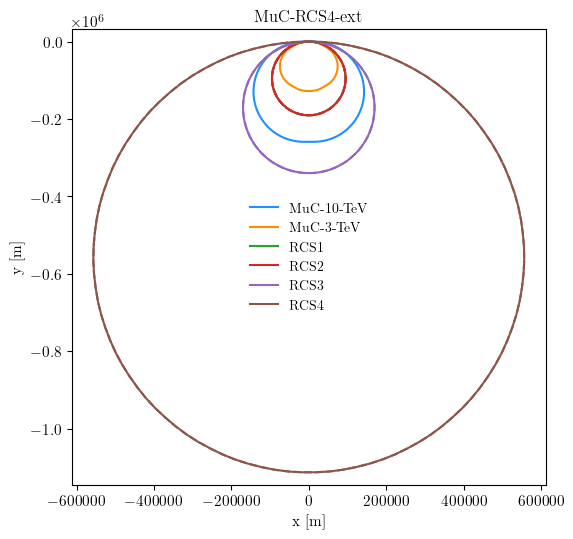

In [564]:
fig, ax = pt.std_fig(figsize=(6, 6))

u = np.linspace(0, 1, 100)

colors = {
    'MuC-10-TeV': 'dodgerblue',
    'MuC-3-TeV': 'darkorange',
    'RCS1-inj': 'tab:green',
    'RCS1-ext': 'tab:green',
    'RCS2-inj': 'tab:red',
    'RCS2-ext': 'tab:red',
    'RCS3-inj': 'tab:purple',
    'RCS3-ext': 'tab:purple',
    'RCS4-inj': 'tab:brown',
    'RCS4-ext': 'tab:brown'
}

for name, lattice in zip(
    ['MuC-10-TeV', 'MuC-3-TeV', 'RCS1-inj', 'RCS1-ext', 'RCS2-inj', 'RCS2-ext', 'RCS3-inj', 'RCS3-ext', 'RCS4-inj', 'RCS4-ext'],
    [lattice_dict_10tev, lattice_dict_3tev, lattice_dict_RCS1_inj, lattice_dict_RCS1_ext, lattice_dict_RCS2_inj, lattice_dict_RCS2_ext, lattice_dict_RCS3_inj, lattice_dict_RCS3_ext, lattice_dict_RCS4_inj, lattice_dict_RCS4_ext]
):
    if '-ext' in name:
        ax.plot(lattice['x'](u), lattice['y'](u), color=colors[name], linestyle='--',zorder=2)
    else:    
        ax.plot(lattice['x'](u), lattice['y'](u), color=colors[name], label=name.replace('-inj', ''), zorder=2)
ax.legend()
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title(f"MuC-{name}")
ax.axis('equal')
fig.savefig(f'beam-optics/ring_{name}.pdf', bbox_inches='tight', dpi=300)


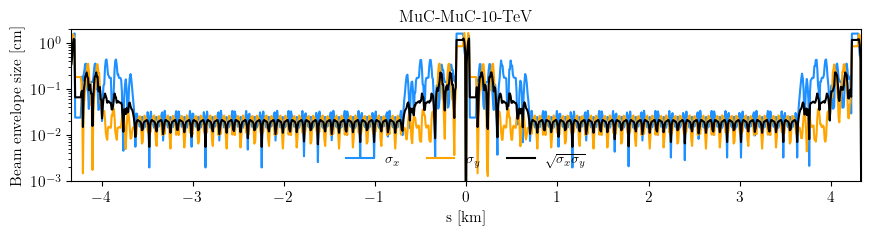

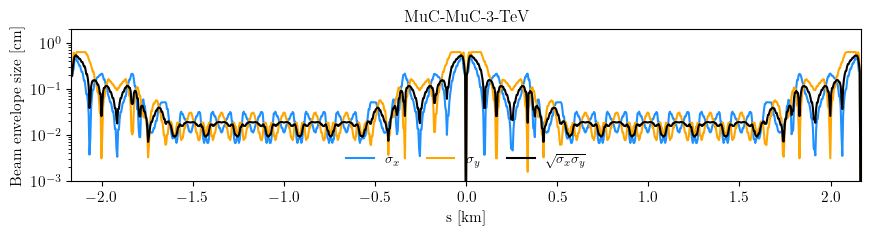

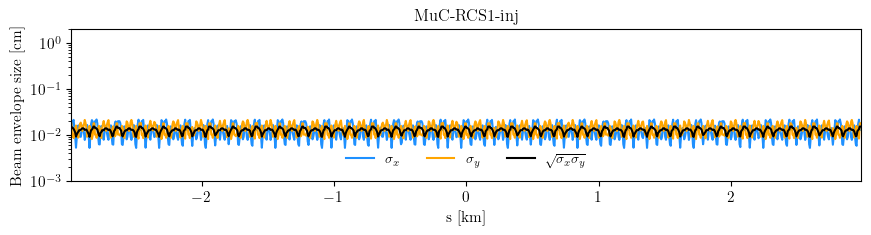

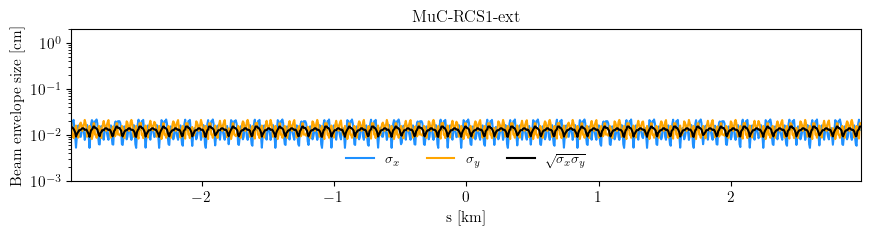

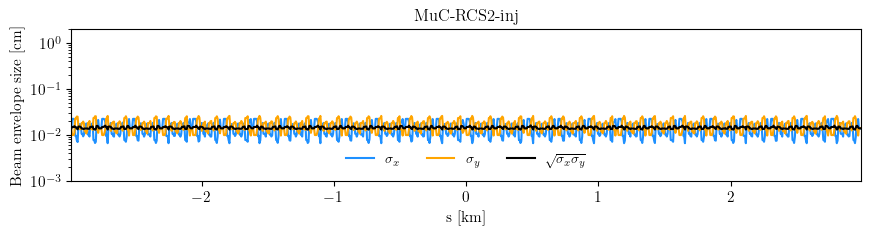

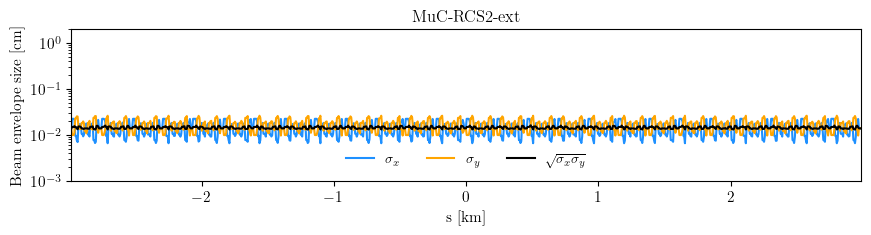

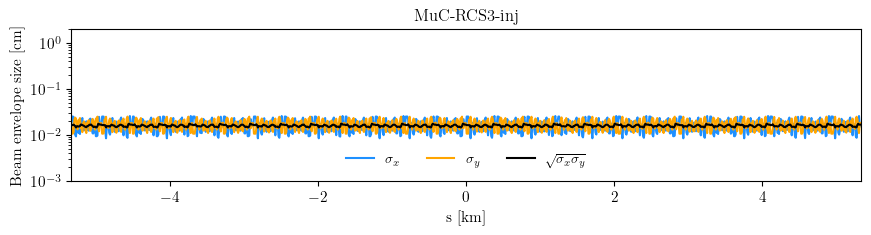

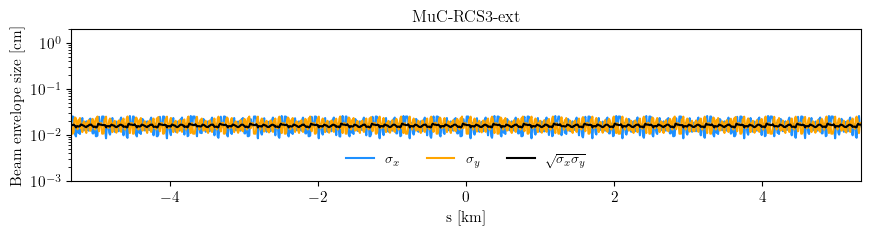

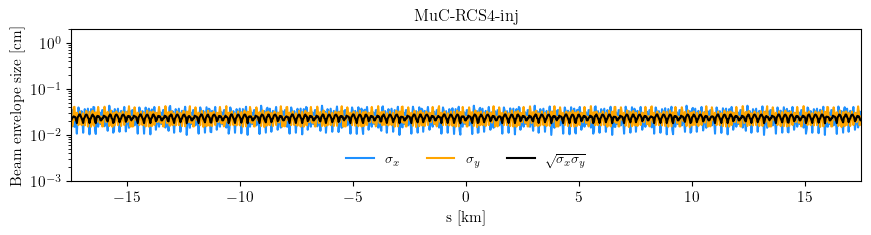

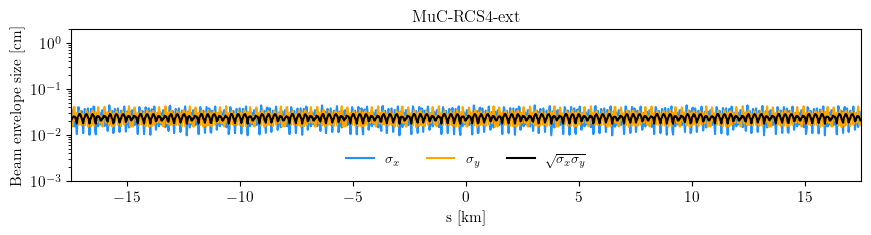

In [550]:
for name, lattice in zip(['MuC-10-TeV', 'MuC-3-TeV', 'RCS1-inj', 'RCS1-ext', 'RCS2-inj', 'RCS2-ext', 'RCS3-inj', 'RCS3-ext', 'RCS4-inj', 'RCS4-ext'], [lattice_dict_10tev, lattice_dict_3tev, lattice_dict_RCS1_inj, lattice_dict_RCS1_ext, lattice_dict_RCS2_inj, lattice_dict_RCS2_ext, lattice_dict_RCS3_inj, lattice_dict_RCS3_ext, lattice_dict_RCS4_inj, lattice_dict_RCS4_ext]):
    u = np.linspace(1, 0, 1_000, endpoint=True)
    s_middle = const.cm_to_km * lattice['s'](1) / 2

    fig, ax = pt.std_fig(figsize=(10, 2))

    ax.plot(const.cm_to_km*lattice['s'](u)-s_middle, lattice['beamsize_x'](u), color='dodgerblue', label='$\sigma_x$')
    ax.plot(const.cm_to_km*lattice['s'](u)-s_middle, lattice['beamsize_y'](u), color='orange', label='$\sigma_y$')
    ax.plot(const.cm_to_km*lattice['s'](u)-s_middle, np.sqrt(lattice['beamsize_y'](u) * lattice['beamsize_x'](u)), color='black', label='$\sqrt{\sigma_x \sigma_y}$')

    ax.legend(loc='lower center', ncol=3)
    ax.set_yscale('log')
    ax.set_xlim(-s_middle, s_middle)
    ax.set_xlabel("s [km]")
    ax.set_ylabel("Beam envelope size [cm]")
    ax.set_ylim(1e-3,2)
    ax.set_title(f"MuC-{name}")
    fig.savefig(f'beam-optics/beam_envelope_{name}.pdf', bbox_inches='tight', dpi=300)

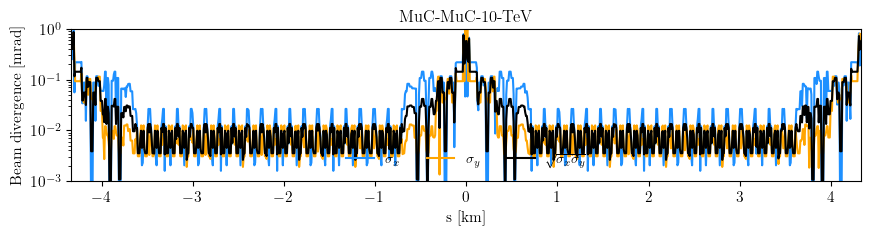

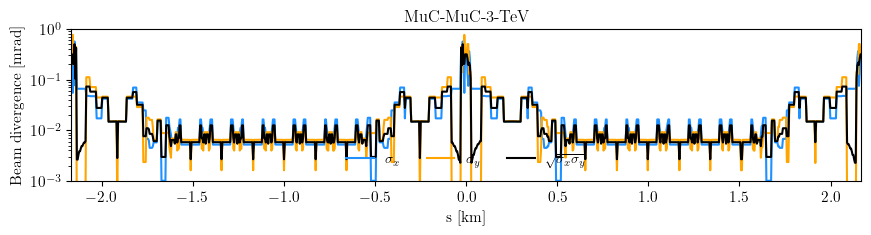

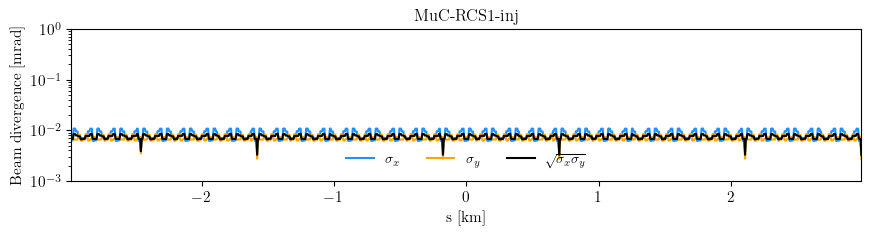

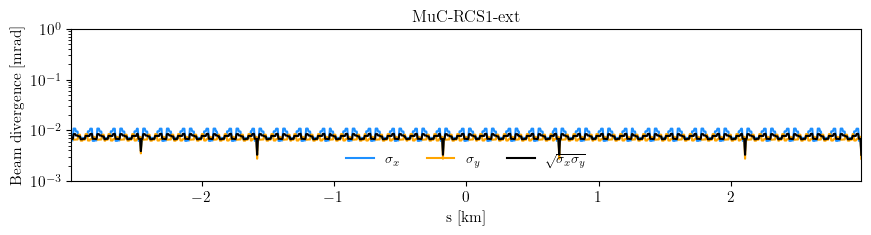

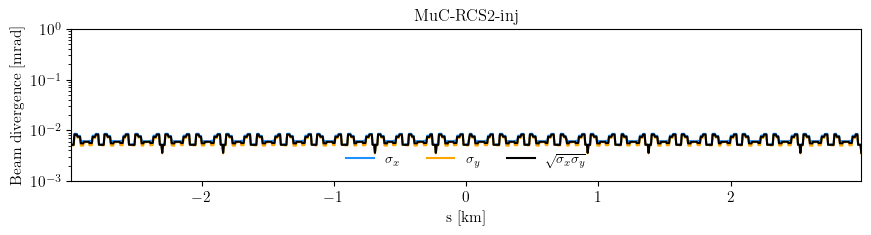

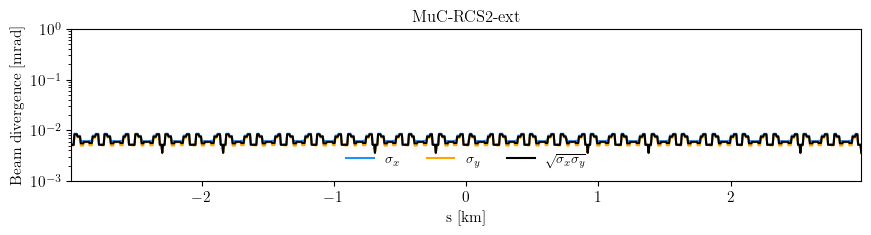

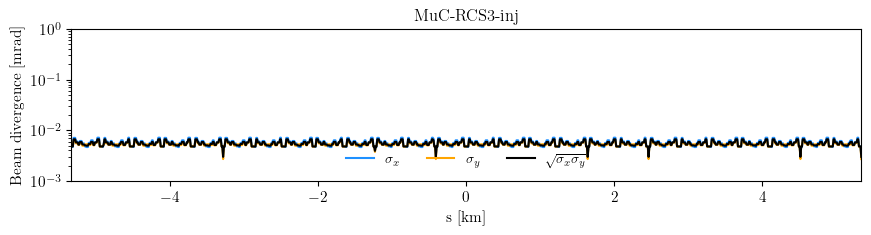

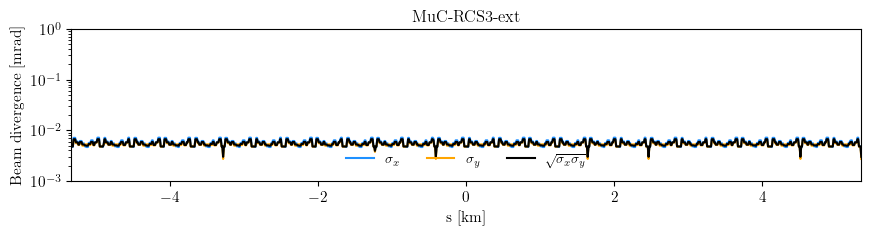

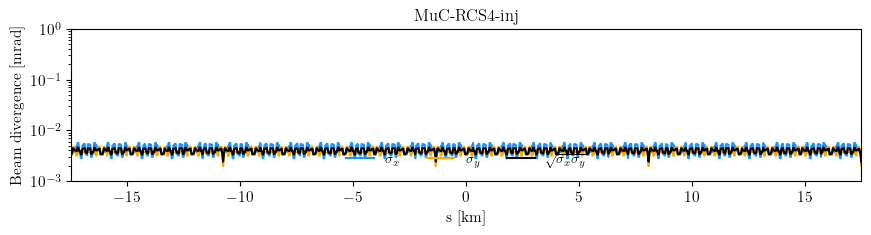

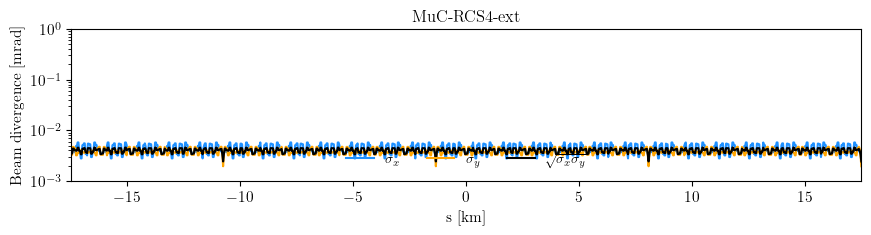

In [553]:
for name, lattice in zip(['MuC-10-TeV', 'MuC-3-TeV', 'RCS1-inj', 'RCS1-ext', 'RCS2-inj', 'RCS2-ext', 'RCS3-inj', 'RCS3-ext', 'RCS4-inj', 'RCS4-ext'], [lattice_dict_10tev, lattice_dict_3tev, lattice_dict_RCS1_inj, lattice_dict_RCS1_ext, lattice_dict_RCS2_inj, lattice_dict_RCS2_ext, lattice_dict_RCS3_inj, lattice_dict_RCS3_ext, lattice_dict_RCS4_inj, lattice_dict_RCS4_ext]):
    u = np.linspace(1, 0, 1_000, endpoint=True)
    s_middle = const.cm_to_km * lattice['s'](1) / 2

    fig, ax = pt.std_fig(figsize=(10, 2))

    ax.plot(const.cm_to_km*lattice['s'](u)-s_middle, 1e3*lattice['beamdiv_x'](u), color='dodgerblue', label='$\sigma_x$')
    ax.plot(const.cm_to_km*lattice['s'](u)-s_middle, 1e3*lattice['beamdiv_y'](u), color='orange', label='$\sigma_y$')
    ax.plot(const.cm_to_km*lattice['s'](u)-s_middle, 1e3*np.sqrt(lattice['beamdiv_y'](u) * lattice['beamdiv_x'](u)), color='black', label='$\sqrt{\sigma_x \sigma_y}$')

    ax.legend(loc='lower center', ncol=3)
    ax.set_yscale('log')
    ax.set_xlim(-s_middle, s_middle)
    ax.set_xlabel("s [km]")
    ax.set_ylabel("Beam divergence [mrad]")
    ax.set_ylim(1e-3,1)
    ax.set_title(f"MuC-{name}")
    fig.savefig(f'beam-optics/beam_divergence_{name}.pdf', bbox_inches='tight', dpi=300)

In [489]:
with open('beam-optics/ring_v06_df.pkl', 'wb') as f:
    pickle.dump(df_10tev, f)

with open('beam-optics/ring_3tev_v1.2_df.pkl', 'wb') as f:
    pickle.dump(df_3tev, f)

In [490]:
df_10tev.to_pickle('beam-optics/ring_v06_df.pkl')
df_3tev.to_pickle('beam-optics/ring_3tev_v1.2_df.pkl')

In [492]:
with open('beam-optics/ring_v06_smoothed.pkl', 'wb') as f:
    pickle.dump(lattice_dict_10tev, f)

with open('beam-optics/ring_3tev_v1.2_smoothed.pkl', 'wb') as f:
    pickle.dump(lattice_dict_3tev, f)

In [493]:
with open('beam-optics/ring_v06_smoothed.pkl', 'rb') as f:
    lattice_10TeV = pickle.load(f)
with open('beam-optics/ring_3tev_v1.2_smoothed.pkl', 'rb') as f:
    lattice_3TeV = pickle.load(f)

# Plotting only the colliders

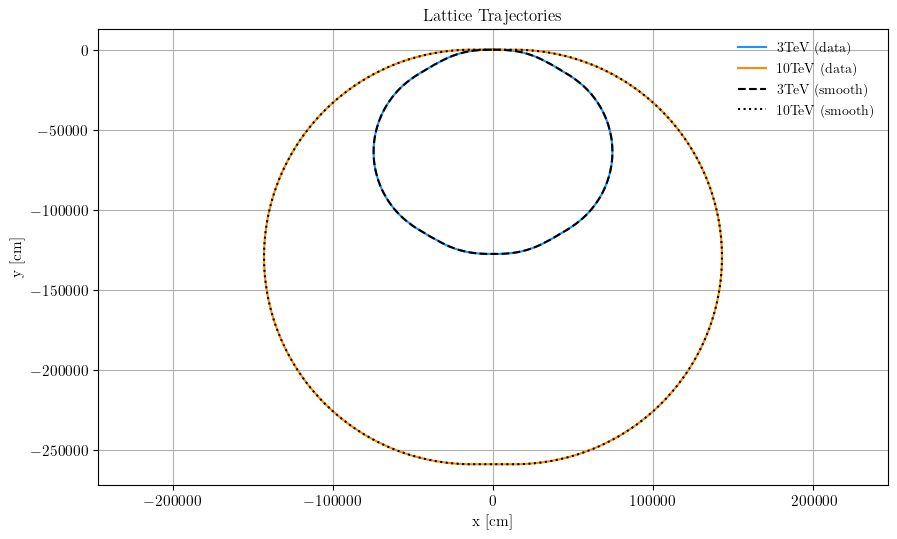

In [552]:
u = np.linspace(0, 1, 1000)

fig, ax = pt.std_fig(figsize=(10, 6))

ax.plot(lattice_3TeV['x'](u), lattice_3TeV['y'](u), label='3TeV (data)', color='dodgerblue')
ax.plot(lattice_10TeV['x'](u), lattice_10TeV['y'](u), label='10TeV (data)', color='darkorange')
ax.plot(lattice_dict_3tev['x'](u), lattice_dict_3tev['y'](u), ls='--', c='black', label='3TeV (smooth)')
ax.plot(lattice_dict_10tev['x'](u), lattice_dict_10tev['y'](u), ls=':', c='black', label='10TeV (smooth)')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title('Lattice Trajectories')
ax.legend()
ax.grid(True)
ax.axis('equal')
fig.savefig('beam-optics/lattice_trajectories.pdf', bbox_inches='tight', dpi=300)

## Plotting cells

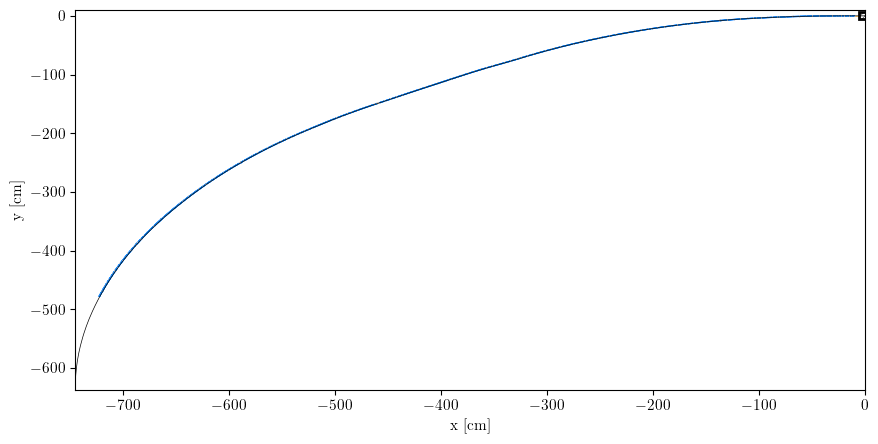

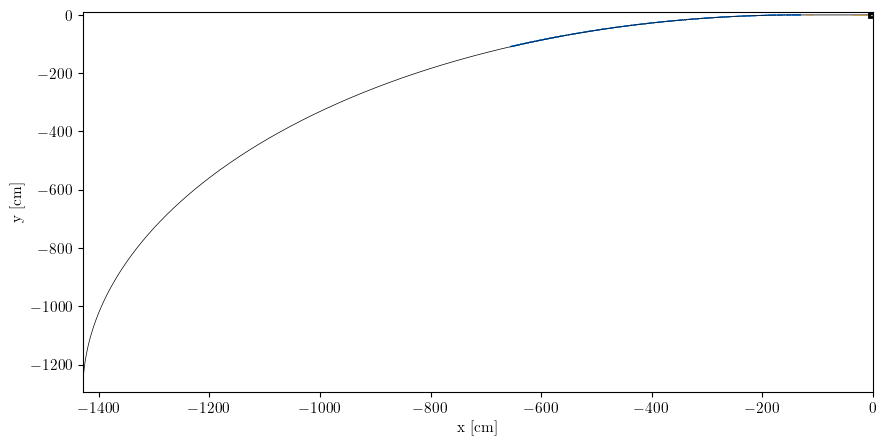

In [434]:
lt.plot_lattice(df_3tev)
lt.plot_lattice(df_10tev)

## Some old experiments with smooth geometrical shapes

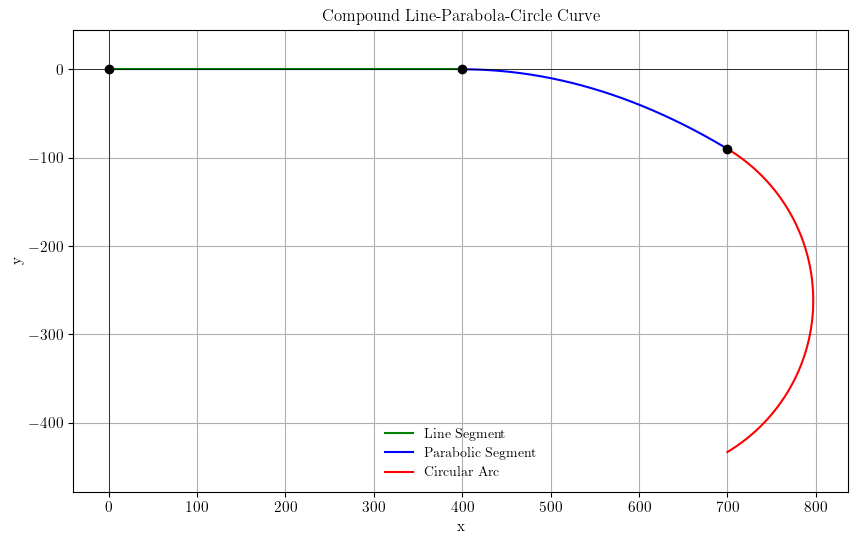

In [472]:
import numpy as np
import matplotlib.pyplot as plt

def plot_compound_curve(P0, L, Lq, radius, num_points=1000, n_degree=2, coeff=1):
    # Straight Line Calculation
    direction = np.array([1, 0])  # Starting with a horizontal direction
    P1 = P0 + direction * L

    vertex = P1
    parabola_x = np.linspace(0, Lq, num_points)
    parabola_y = -coeff * parabola_x**n_degree
    parabolic_points = np.column_stack((P1[0] + parabola_x, P1[1] + parabola_y))

    # Transition point coordinates (end of parabola, start of circle)
    P2 = parabolic_points[-1]

    # Circle center should be such that the tangent at P2 matches parabola's tangent
    tangent_slope = -(n_degree) * coeff * parabola_x[-1]**(n_degree-1)
    tangent_angle = np.arctan(tangent_slope)

    # Assume P2 is on the circle and we know its slope
    theta_start = tangent_angle+np.pi/2  # Start from this
    center = P2 - radius * np.array([np.cos(theta_start), np.sin(theta_start)])

    # Define the arc itself
    theta_end = -theta_start
    theta_arc = np.linspace(theta_start, theta_end, num_points)
    arc_points = np.zeros((num_points, 2))
    arc_points[:, 0] = center[0] + radius * np.cos(theta_arc)
    arc_points[:, 1] = center[1] + radius * np.sin(theta_arc)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot([P0[0], P1[0]], [P0[1], P1[1]], 'g-', label='Line Segment')
    plt.plot(parabolic_points[:, 0], parabolic_points[:, 1], 'b-', label='Parabolic Segment')
    plt.plot(arc_points[:, 0], arc_points[:, 1], 'r-', label='Circular Arc')

    plt.scatter(*zip(P0, P1, P2), color='black', zorder=5)
    plt.title('Compound Line-Parabola-Circle Curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage
start_point = np.array([0, 0])
line_length = 400
parabolic_length = 300
circle_radius = 200

plot_compound_curve(start_point, line_length, parabolic_length, circle_radius, n_degree=2, coeff=0.001)